# Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_final_sequence.csv')

In [3]:
df

,Protien Number,Sequence,Vaccine Candidate
0,A0A081UPN5,MSETKTNLLDLDRDAMRAFFVELGEKPFRADQVMKWIYHFGCDDFD...,0
1,A0A081UQL1,MTKQIKRIGVLTSGGDAPGMNAAIRAVVRAGLHHGLEVYGIYDGYL...,0
2,A0A0F6KC92,MKKVGLVGWRGMVGSVLMSRMQEEKDFSRIQPTFFTTSQAGEAAPN...,0
3,A0A0S3BF99,MPKKFYVSWDNLQREARRLARRQLPVSQWKGIIAVSRGGLVPAALM...,0
4,A0A0T6R2D4,MKKVGLVGWRGMVGSVLMSRMQEEQDFAHIQPTFFTTSQAGEAAPN...,0
...,...,...,...
521,AJE37222.1,MRDTTQVRAMDDYFHSLLLDDALLLDSSDEPDSAPVIQLQRQPQPV...,1
522,AJE37560.1,MEKVIFKRAALSAAIVAAMLAPGMVLAADEAGPTYAAAASKFYEEG...,1
523,AJE37735.1,MRNLTLLSLGLLAANAAHADLGEIPKQSGWSGFLLGGVNAVSYKSN...,1
524,AJE37742.1,MFKANGKGNAVRLVLSVATVAVLAACSSPQERKMANRGFEYEDARL...,1


# Creating Simialrity Matrix

In [4]:
import pandas as pd
from Bio.Seq import Seq
from Bio import pairwise2
import numpy as np

/mmfs1/home/mmishkatur.rahman/.local/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [5]:
# Function to calculate similarity between two sequences using PairwiseAligner
def seq_similarity(seq1,seq2):
    
    alignments = pairwise2.align.globalxx(seq1, seq2)
    best_alignment = alignments[0]
    aligned_seq1 = best_alignment[0]
    aligned_seq2 = best_alignment[1]
    num_matches = 0
    num_mismatches = 0
    for i in range(len(aligned_seq1)):
        if aligned_seq1[i] == aligned_seq2[i]:
            num_matches += 1
        else:
            num_mismatches += 1
    similarity = num_matches / (num_matches + num_mismatches)
    
    return similarity


# Assuming df is already loaded and has columns 'Sequence' and 'Protien Number'
sequences = df['Sequence']
protein_numbers = df['Protien Number']

# Initialize an empty DataFrame to store similarity scores
similarity_matrix = pd.DataFrame(index=protein_numbers, columns=protein_numbers, dtype=float)

# Calculate pairwise similarity scores and store them in the matrix
for i in range(len(sequences)):
    for j in range(i, len(sequences)):  # Only compute upper triangle for efficiency
        seq1 = Seq(sequences[i])
        seq2 = Seq(sequences[j])
        similarity = seq_similarity(seq1, seq2)
        similarity_matrix.iat[i, j] = similarity
        similarity_matrix.iat[j, i] = similarity  # Mirror the score for symmetric matrix

# Display the first few entries of the similarity matrix
display(similarity_matrix.head())


Protien Number,A0A081UPN5,A0A081UQL1,A0A0F6KC92,A0A0S3BF99,A0A0T6R2D4,A0A0T6SPP4,A0A0T6U1G3,A0A0T6UFK9,A0A165RH90,A0A165S9D4,...,AJE34456.1,AJE34989.1,AJE35418.1,AJE37118.1,AJE37120.1,AJE37222.1,AJE37560.1,AJE37735.1,AJE37742.1,AJE38071.1
Protien Number,,,,,,,,,,,,,,,,,,,,,
A0A081UPN5,1.000000,0.221239,0.238255,0.197248,0.234506,0.200000,0.220884,0.221239,0.220302,0.219396,...,0.218792,0.210084,0.203750,0.171171,0.171149,0.223464,0.214900,0.215652,0.220758,0.206897
A0A081UQL1,0.221239,1.000000,0.228319,0.213198,0.230906,0.207071,0.220816,0.957576,0.211628,0.227504,...,0.211781,0.225806,0.217219,0.167650,0.175676,0.211462,0.223744,0.228893,0.220665,0.220812
A0A0F6KC92,0.238255,0.228319,1.000000,0.203661,0.944882,0.203661,0.236167,0.228319,0.218415,0.245557,...,0.230769,0.208333,0.228717,0.178307,0.180929,0.233209,0.225899,0.218371,0.241667,0.202273
A0A0S3BF99,0.197248,0.213198,0.203661,1.000000,0.198630,0.949686,0.168614,0.216285,0.225694,0.196121,...,0.161937,0.213333,0.158951,0.109290,0.208145,0.212534,0.164835,0.193627,0.213303,0.199234
A0A0T6R2D4,0.234506,0.230906,0.944882,0.198630,1.000000,0.198630,0.233154,0.228723,0.224138,0.250000,...,0.231081,0.213836,0.230573,0.177486,0.184275,0.229050,0.224460,0.216638,0.242070,0.205479


In [6]:
# Flatten the matrix while excluding NaN values on the diagonal
similarity_values = similarity_matrix.values.flatten()
similarity_values = similarity_values[~np.isnan(similarity_values)]

# Calculate quantiles
quantiles = np.quantile(similarity_values, [0.05, 0.10, 0.15, 0.20, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
quantiles

array([0.10105501, 0.1302521 , 0.14782609, 0.16085791, 0.17073171,
       0.20372355, 0.22068966, 0.23048093, 0.23638132, 0.9127907 ])

In [7]:
# Count the number of scores less than or equal to 0.204
count_less_equal_204 = np.sum(similarity_values >= 0.237)
count_less_equal_204

12812

In [8]:
#similarity_matrix.to_csv('similarity_matrix.csv')

In [9]:

# Convert the similarity matrix to an edge list format for graph creation
# Only include edges with similarity above a chosen threshold (e.g., 0.5)
threshold = 0.237
edge_list = []
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        similarity = similarity_matrix.iat[i, j]
        if similarity >= threshold:
            edge_list.append((protein_numbers[i], protein_numbers[j], similarity))

# Convert edge list to DataFrame
edges_df = pd.DataFrame(edge_list, columns=['Node1', 'Node2', 'Similarity'])

edges_df

,Node1,Node2,Similarity
0,A0A081UPN5,A0A0F6KC92,0.238255
1,A0A081UPN5,A0A2R4TUQ0,1.000000
2,A0A081UPN5,A0A2R4TWF6,0.238255
3,A0A081UPN5,A0AAC9FNM6,0.911458
4,A0A081UPN5,A0AAD3UBV7,0.238255
...,...,...,...
6138,AJE38225.1,AJE37560.1,0.245171
6139,AJE38225.1,AJE37735.1,0.243682
6140,AJE38225.1,AJE37742.1,0.241087
6141,AJE34989.1,AJE38071.1,0.248299


In [10]:
edges_df['Normalized'] = edges_df.apply(lambda row: tuple(sorted([row['Node1'], row['Node2']])), axis=1)

# Check for duplicates in the normalized edge list
duplicate_edges = edges_df['Normalized'].duplicated().sum()
duplicate_edges

0

# extracting physiochemical features

In [11]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from tqdm import tqdm  # Import tqdm for the progress bar
import re

In [12]:
# Initialize lists to store physio-chemical properties
molecular_weights = []
isoelectric_points = []
instability_indices = []
aromaticities = []
gravies = []

# Function to clean sequences by removing non-standard amino acid characters
def clean_sequence(sequence):
    return re.sub(r'[^ACDEFGHIKLMNPQRSTVWY]', '', sequence)  # Keep only valid amino acid codes

# Extract features for each sequence in the DataFrame with tqdm progress bar
for sequence in tqdm(df['Sequence'], desc="Extracting Physiochemical Properties"):
    cleaned_sequence = clean_sequence(sequence)  # Clean the sequence
    analyzed_seq = ProteinAnalysis(cleaned_sequence)
    
    # Calculate physio-chemical properties
    molecular_weights.append(analyzed_seq.molecular_weight())
    isoelectric_points.append(analyzed_seq.isoelectric_point())
    instability_indices.append(analyzed_seq.instability_index())
    aromaticities.append(analyzed_seq.aromaticity())
    gravies.append(analyzed_seq.gravy())

# Add the calculated features to the DataFrame
df['Molecular Weight'] = molecular_weights
df['Isoelectric Point'] = isoelectric_points
df['Instability Index'] = instability_indices
df['Aromaticity'] = aromaticities
df['GRAVY'] = gravies

# Display the updated DataFrame
df

Extracting Physiochemical Properties: 100%|██████████| 526/526 [00:00<00:00, 6750.70it/s]


,Protien Number,Sequence,Vaccine Candidate,Molecular Weight,Isoelectric Point,Instability Index,Aromaticity,GRAVY
0,A0A081UPN5,MSETKTNLLDLDRDAMRAFFVELGEKPFRADQVMKWIYHFGCDDFD...,0,41148.0223,8.122904,36.044414,0.065395,-0.272207
1,A0A081UQL1,MTKQIKRIGVLTSGGDAPGMNAAIRAVVRAGLHHGLEVYGIYDGYL...,0,34916.5826,6.392420,30.470588,0.049536,-0.099381
2,A0A0F6KC92,MKKVGLVGWRGMVGSVLMSRMQEEKDFSRIQPTFFTTSQAGEAAPN...,0,40120.7133,5.224095,32.546631,0.061995,0.017790
3,A0A0S3BF99,MPKKFYVSWDNLQREARRLARRQLPVSQWKGIIAVSRGGLVPAALM...,0,17419.7965,5.000376,47.660710,0.083871,-0.156774
4,A0A0T6R2D4,MKKVGLVGWRGMVGSVLMSRMQEEQDFAHIQPTFFTTSQAGEAAPN...,0,40117.7955,5.224095,35.621892,0.062162,0.033243
...,...,...,...,...,...,...,...,...
521,AJE37222.1,MRDTTQVRAMDDYFHSLLLDDALLLDSSDEPDSAPVIQLQRQPQPV...,1,32537.6958,4.525487,50.040000,0.065517,-0.214483
522,AJE37560.1,MEKVIFKRAALSAAIVAAMLAPGMVLAADEAGPTYAAAASKFYEEG...,1,52956.8389,4.956212,27.165759,0.147609,-0.480042
523,AJE37735.1,MRNLTLLSLGLLAANAAHADLGEIPKQSGWSGFLLGGVNAVSYKSN...,1,36994.5547,5.159184,35.974187,0.129518,-0.407530
524,AJE37742.1,MFKANGKGNAVRLVLSVATVAVLAACSSPQERKMANRGFEYEDARL...,1,41560.9775,4.964511,39.992005,0.098930,-0.468449


# Generate Embedding using ESM-2

In [13]:
from transformers import AutoModel, AutoTokenizer
import torch

In [14]:
# Load the Hugging Face ESM-2 model and tokenizer
model = AutoModel.from_pretrained("facebook/esm2_t30_150M_UR50D")
tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t30_150M_UR50D")
model.eval()  # Disable dropout for evaluation

# Move model to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to split sequences longer than 1022 into chunks
def split_sequence(sequence, chunk_size=1022):
    return [sequence[i:i + chunk_size] for i in range(0, len(sequence), chunk_size)]

# Function to generate embeddings for a list of sequences
def generate_protein_embeddings(sequences, ids, batch_size=32):
    embeddings = {}
    for i in tqdm(range(0, len(sequences), batch_size), desc="Generating Embeddings"):
        batch_seqs = sequences[i:i + batch_size]
        batch_ids = ids[i:i + batch_size]
        
        for seq, id in zip(batch_seqs, batch_ids):
            # Split sequence if it's longer than 1022 residues
            chunks = split_sequence(seq) if len(seq) > 1022 else [seq]

            # Generate embeddings for each chunk and take the mean
            chunk_embeddings = []
            for chunk in chunks:
                inputs = tokenizer(chunk, return_tensors='pt', padding=True).to(device)
                with torch.no_grad():
                    outputs = model(**inputs)
                # Take mean of token embeddings from the last layer
                token_embeddings = outputs.last_hidden_state.mean(dim=1).squeeze(0)
                chunk_embeddings.append(token_embeddings)

            # Calculate the mean of all chunk embeddings
            combined_embedding = torch.stack(chunk_embeddings).mean(dim=0)
            embeddings[id] = combined_embedding.cpu().numpy()

    return embeddings

# Assuming df is the DataFrame containing the sequences and protein numbers
# Clean sequences to remove non-standard amino acid characters
df['Cleaned Sequence'] = df['Sequence'].apply(lambda x: re.sub(r'[^ACDEFGHIKLMNPQRSTVWY]', '', x))

# Prepare data for embedding generation
protein_ids = df['Protien Number'].tolist()
cleaned_sequences = df['Cleaned Sequence'].tolist()

# Generate embeddings
embeddings_dict = generate_protein_embeddings(cleaned_sequences, protein_ids)

# Convert the embeddings dictionary to a DataFrame
embeddings_df = pd.DataFrame.from_dict(embeddings_dict, orient='index')
embeddings_df.reset_index(inplace=True)
embeddings_df.rename(columns={'index': 'Protien Number'}, inplace=True)

# Display the first few rows of the embeddings DataFrame
embeddings_df


Some weights of EsmModel were not initialized from the model checkpoint at facebook/esm2_t30_150M_UR50D and are newly initialized: ['esm.pooler.dense.bias', 'esm.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Generating Embeddings: 100%|██████████| 17/17 [00:19<00:00,  1.16s/it]


,Protien Number,0,1,2,3,4,5,6,7,8,...,630,631,632,633,634,635,636,637,638,639
0,A0A081UPN5,-0.038111,-0.026883,-0.000614,-0.063177,0.055006,0.036491,-0.005557,-0.067594,-0.039859,...,-0.082823,-0.036510,0.020588,-0.013637,0.003912,-0.052443,-0.050889,-0.016623,-0.109427,-0.003069
1,A0A081UQL1,-0.125619,-0.070630,-0.006582,-0.060403,0.161851,0.017581,-0.004785,-0.063303,-0.070916,...,-0.065239,-0.070457,0.013707,-0.013592,-0.063521,0.025742,-0.096233,0.009414,-0.179594,-0.145452
2,A0A0F6KC92,0.018816,-0.078923,-0.078683,-0.011715,0.058420,0.019710,0.025389,-0.044613,-0.040737,...,-0.082951,-0.037765,-0.358283,-0.090527,-0.032247,0.013342,-0.005213,-0.032945,-0.089600,-0.024547
3,A0A0S3BF99,-0.042014,-0.137409,0.009741,-0.014019,-0.027253,-0.001259,0.026451,-0.136995,-0.058627,...,-0.075439,-0.014709,-0.214947,-0.021020,-0.131778,0.025642,-0.015276,-0.003691,-0.057814,-0.040517
4,A0A0T6R2D4,0.017402,-0.087016,-0.079623,-0.017289,0.070896,0.017167,0.027766,-0.050070,-0.048849,...,-0.085999,-0.044407,-0.362545,-0.083636,-0.037688,0.020056,0.005240,-0.033607,-0.090697,-0.021413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,AJE37222.1,0.113105,-0.108322,0.071104,-0.035429,0.187292,0.070366,0.095225,-0.141964,-0.033666,...,-0.023269,0.026326,-0.302948,0.061150,-0.123618,0.025197,0.018732,-0.155419,-0.111248,0.014223
522,AJE37560.1,0.043055,-0.067447,-0.011981,0.078905,0.051042,0.028569,0.013305,0.104298,-0.070398,...,0.062033,-0.117549,-0.409366,-0.139961,0.119814,0.110678,0.036373,0.006976,-0.179999,-0.006528
523,AJE37735.1,0.064316,-0.228732,-0.108717,-0.013516,0.209790,-0.048588,-0.000470,0.140135,0.069927,...,-0.030221,-0.071660,-0.361174,-0.173589,0.018985,0.180622,0.059118,-0.108138,0.020192,0.043806
524,AJE37742.1,0.079154,-0.143367,-0.084286,-0.001998,0.020457,0.080464,0.068989,0.054654,-0.007126,...,-0.032874,-0.110926,-0.767147,-0.094820,-0.063644,0.084566,0.083537,-0.045985,-0.050931,0.042316


# Creating the Graph

In [15]:
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [16]:
# Define the physiological feature columns
physiochemical_columns = ['Molecular Weight', 'Isoelectric Point', 'Instability Index', 'Aromaticity', 'GRAVY']

# Extract physiological features and standardize them
scaler = StandardScaler()
physiochemical_features = scaler.fit_transform(df[physiochemical_columns])

# Map protein IDs to standardized physiological features for easy lookup
standardized_features_df = pd.DataFrame(physiochemical_features, columns=physiochemical_columns)
standardized_features_df.insert(0, 'Protien Number', df['Protien Number'].values)

# Initialize an undirected graph
G = nx.Graph()

# Add nodes with combined features (embedding + standardized physiological features)
for idx, row in df.iterrows():
    protein_id = row['Protien Number']
    
    # Retrieve the embedding for this protein ID from embeddings_df
    embedding = embeddings_df.loc[embeddings_df['Protien Number'] == protein_id].iloc[:, 1:].values.flatten()  # Exclude 'Protien Number' column
    
    # Retrieve the standardized physiological features from standardized_features_df
    features = standardized_features_df.loc[standardized_features_df['Protien Number'] == protein_id, physiochemical_columns].values.flatten()
    
    # Combine embedding and standardized features
    node_features = {'embedding': embedding, 'features': features}
    
    # Add node with combined features to graph
    G.add_node(protein_id, **node_features)

# Add edges based on edges_df
for _, edge in edges_df.iterrows():
    node1 = edge['Node1']
    node2 = edge['Node2']
    G.add_edge(node1, node2)

# Display basic information about the graph
print(G)


Graph with 526 nodes and 6143 edges


In [17]:
# Select a node to display its features
sample_node = list(G.nodes)[0]  # Get the first node in the graph

# Get node features
node_features = G.nodes[sample_node]

# Display node features and their shapes
embedding_shape = node_features['embedding'].shape
features_shape = node_features['features'].shape

print(f"Sample Node: {sample_node}")
print(f"Embedding (Shape: {embedding_shape}): {node_features['embedding']}")
print(f"Physicochemical Features (Shape: {features_shape}): {node_features['features']}")

# Display edges connected to the sample node
connected_edges = list(G.edges(sample_node))
print(f"\nEdges connected to node '{sample_node}': {connected_edges}")
print(f"Number of connected edges: {len(connected_edges)}")

Sample Node: A0A081UPN5
Embedding (Shape: (640,)): [-3.81105728e-02 -2.68826038e-02 -6.13529352e-04 -6.31771386e-02
  5.50060421e-02  3.64911743e-02 -5.55688096e-03 -6.75942004e-02
 -3.98592129e-02  1.05558909e-01  1.60412431e-01  2.49467921e-02
  7.95287564e-02 -5.28214425e-02 -3.96470837e-02 -2.13622279e-03
 -1.28720729e-02  5.89421690e-02  1.72047485e-02 -4.95503247e-02
 -9.70803797e-02 -2.53078397e-02  5.18960208e-02 -1.53502673e-02
 -6.87871426e-02 -9.35713425e-02  9.70854834e-02 -1.76975876e-02
  3.35008577e-02 -8.79514739e-02  1.11988574e-01  5.68499090e-03
 -4.03285660e-02 -4.89146858e-02  1.01828806e-01 -2.48981062e-02
 -1.02104768e-02  8.73614997e-02 -8.20962340e-02  7.52084777e-02
  1.82032108e-01  4.75045703e-02 -1.17710547e-03  1.97785590e-02
 -1.28857046e-01  1.77075099e-02 -1.79383885e-02 -7.75496438e-02
  3.23502347e-02  1.06019683e-01  6.33189231e-02  1.57301349e-03
 -4.79600243e-02  3.06331981e-02 -9.81086791e-02 -1.31987575e-02
  2.44148731e-01 -4.51363670e-03 -4.748

In [18]:
# Check if the graph G is connected and display connected components information if not
if nx.is_connected(G):
    print("The graph G is connected.")
else:
    print("The graph G is not connected.")
    
    # Get connected components
    connected_components = list(nx.connected_components(G))
    num_components = len(connected_components)
    
    print(f"Number of connected components: {num_components}")
    print("Number of nodes in each connected component:")
    
    for i, component in enumerate(connected_components, 1):
        print(f"Component {i}: {len(component)} nodes")


The graph G is not connected.
Number of connected components: 12
Number of nodes in each connected component:
Component 1: 514 nodes
Component 2: 1 nodes
Component 3: 1 nodes
Component 4: 1 nodes
Component 5: 1 nodes
Component 6: 1 nodes
Component 7: 1 nodes
Component 8: 1 nodes
Component 9: 1 nodes
Component 10: 2 nodes
Component 11: 1 nodes
Component 12: 1 nodes


# Creating GAT Model

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GATv2Conv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Create a mapping from protein ID (string) to integer
protein_id_to_int = {protein_id: idx for idx, protein_id in enumerate(G.nodes)}

# Step 2: Prepare Node Features and Labels
node_features = []
node_labels = []
for node in G.nodes:
    # Combine embedding and physiological features
    combined_features = np.concatenate([G.nodes[node]['embedding'], G.nodes[node]['features']])
    node_features.append(combined_features)
    # Get the label using the protein ID-to-int mapping
    label = int(df.loc[df['Protien Number'] == node, 'Vaccine Candidate'].values[0])
    node_labels.append(label)

# Convert node features and labels to numpy arrays and then to tensors
node_features = torch.tensor(np.array(node_features), dtype=torch.float).to(device)
node_labels = torch.tensor(np.array(node_labels), dtype=torch.long).to(device)

# Step 3: Convert edges to integer indices using the mapping
edge_index = torch.tensor(
    [[protein_id_to_int[node1], protein_id_to_int[node2]] for node1, node2 in G.edges], 
    dtype=torch.long
).t().contiguous().to(device)

# Create PyTorch Geometric Data object
data = Data(x=node_features, edge_index=edge_index, y=node_labels)

# Display basic information to confirm
print(f"Node features shape: {data.x.shape}")
print(f"Edge index shape: {data.edge_index.shape}")
print(f"Labels shape: {data.y.shape}")

Node features shape: torch.Size([526, 645])
Edge index shape: torch.Size([2, 6143])
Labels shape: torch.Size([526])


In [78]:
# Split Data into Train, Validation, and Test Sets
train_data, test_data = train_test_split(range(data.num_nodes), test_size=0.2, stratify=data.y.cpu(), random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.125, stratify=data.y[train_data].cpu(), random_state=42)

train_mask = torch.zeros(data.num_nodes, dtype=torch.bool).to(device)
val_mask = torch.zeros(data.num_nodes, dtype=torch.bool).to(device)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool).to(device)
train_mask[train_data] = True
val_mask[val_data] = True
test_mask[test_data] = True

data.train_mask = train_mask
data.val_mask = val_mask
data.test_mask = test_mask

In [79]:
class GATBinaryClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GATBinaryClassifier, self).__init__()
        # Use GATv2Conv for improved attention dynamics
        self.conv1 = GATv2Conv(in_channels, hidden_channels, heads=8, dropout=0.5)
        self.conv2 = GATv2Conv(hidden_channels * 8, out_channels, heads=1, concat=False, dropout=0.5)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.leaky_relu(x)
        x = self.conv2(x, edge_index)
        return x

# Define the criterion with class weights
criterion = nn.CrossEntropyLoss()

# Initialize model, loss, and optimizer
model = GATBinaryClassifier(in_channels=node_features.shape[1], hidden_channels=64, out_channels=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is appropriate for binary classification with two classes


In [80]:
import torch.nn.functional as F
# Training Function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluation Function
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out[mask].argmax(dim=1)
        loss = criterion(out[mask], data.y[mask]).item()
    return loss, pred

Training Epochs: 100%|██████████| 5/5 [00:00<00:00, 165.65it/s]

Epoch 1, Train Loss: 0.6314, Val Loss: 0.7056, Val Accuracy: 0.8302
Epoch 2, Train Loss: 0.8919, Val Loss: 0.6767, Val Accuracy: 0.8302
Epoch 3, Train Loss: 0.7204, Val Loss: 0.5556, Val Accuracy: 0.8302
Epoch 4, Train Loss: 0.5625, Val Loss: 0.4873, Val Accuracy: 0.8302
Epoch 5, Train Loss: 0.4477, Val Loss: 0.5369, Val Accuracy: 0.7925
Accuracy: 0.8301886792452831
Precision: 0.5333333333333333
Recall: 0.42105263157894735
F1-score: 0.47058823529411764
ROC-AUC score: 0.8324258923169994
Log Loss: 0.4326972850919718


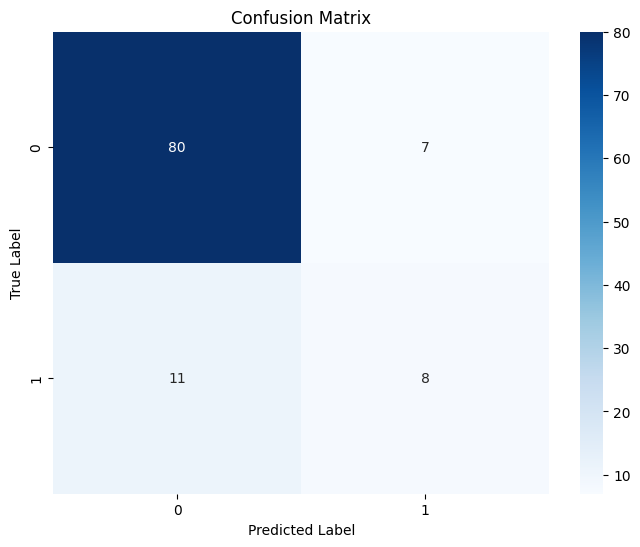

In [81]:
# Train and Validate the Model with TQDM Progress Bar
for epoch in tqdm(range(1, 6), desc="Training Epochs"):
    train_loss = train()
    val_loss, val_pred = evaluate(data.val_mask)
    val_acc = accuracy_score(data.y[data.val_mask].cpu(), val_pred.cpu())
    print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

# Test the Model and Calculate Metrics
test_loss, test_pred = evaluate(data.test_mask)
test_true = data.y[data.test_mask].cpu()
test_pred = test_pred.cpu()

# Calculate metrics
accuracy = accuracy_score(test_true, test_pred)
precision = precision_score(test_true, test_pred, zero_division=0)
recall = recall_score(test_true, test_pred)
f1 = f1_score(test_true, test_pred)
roc_auc = roc_auc_score(test_true, model(data.x, data.edge_index)[data.test_mask, 1].detach().cpu().numpy())
logloss = log_loss(test_true, model(data.x, data.edge_index)[data.test_mask].softmax(dim=1).detach().cpu().numpy())
conf_matrix = confusion_matrix(test_true, test_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [51]:
# Display all sequences from the test set with actual and predicted labels
test_indices = data.test_mask.nonzero(as_tuple=True)[0]  # Get all indices in the test set

print("\nAll sequences from the test set with actual and predicted labels:")
for i, idx in enumerate(test_indices):
    sequence = df.iloc[int(idx)]["Sequence"]  # Convert idx to integer for indexing
    actual = test_true[i].item()  # Use i to index directly within test_true
    predicted = test_pred[i].item()  # Use i to index directly within test_pred
    print(f"Sequence: {sequence[:50]}...")  # Show the first 50 characters for brevity
    print(f"Actual: {actual}, Predicted: {predicted}\n")



All sequences from the test set with actual and predicted labels:
Sequence: MTKQIKRIGVLTSGGDAPGMNAAIRAVVRAGLHHGLEVYGIYDGYLGLHQ...
Actual: 0, Predicted: 0

Sequence: MANPLNTLRFPLYGERLIEASAGTGKTYTIAGLYLRLLLGHGPLIEEGED...
Actual: 0, Predicted: 0

Sequence: MSETKTNLLDLDRDAMRAFFVELGEKPFRADQVMKWIYHFGCDDFDQMNN...
Actual: 0, Predicted: 0

Sequence: MLLWLGKRAYRDENMLKVNEYFDGNVKSIGFEQKGDKATVGVMEAGHYQF...
Actual: 0, Predicted: 0

Sequence: MSQQFNVAVLGASGAVGEAMIEILEERAFPIATLYPLASSRSAGDTVRFA...
Actual: 0, Predicted: 0

Sequence: MRCRLRCPPNLPVRRLLLSRALDALLRPFGIQAPALTLTDIQLDSRRVGP...
Actual: 0, Predicted: 0

Sequence: MRVLKFGGSSLADAERFLRVADIAVNTHGQSQVALVLSAPAKVTNHLVAL...
Actual: 0, Predicted: 0

Sequence: MVEIIRGALGTKEGGSLPQGLWQTEQIRALERNWAAREGQPLYALMERAG...
Actual: 0, Predicted: 0

Sequence: MEQQQQGEIAVAAEAGLKRRHVHKFGGSSLADPVCYRRVASIVEQQVGGD...
Actual: 0, Predicted: 0

Sequence: MSETKINLLDLDRDAMRAFFVELGEKPFRADQVMKWIYHFGCDDFDQMTN...
Actual: 0, Predicted: 0

Sequence: MKRMLINATQEEELRVALVDGQQLYDLDIESPG

# 100 epochs

Training Epochs:  18%|█▊        | 18/100 [00:00<00:00, 149.70it/s]


Epoch 1, Train Loss: 0.4804, Val Loss: 0.5757, Val Accuracy: 0.6792
Epoch 2, Train Loss: 0.5210, Val Loss: 0.5320, Val Accuracy: 0.8491
Epoch 3, Train Loss: 0.4850, Val Loss: 0.4836, Val Accuracy: 0.8302
Epoch 4, Train Loss: 0.4353, Val Loss: 0.4689, Val Accuracy: 0.8302
Epoch 5, Train Loss: 0.4349, Val Loss: 0.4747, Val Accuracy: 0.8302
Epoch 6, Train Loss: 0.4521, Val Loss: 0.4791, Val Accuracy: 0.8302
Epoch 7, Train Loss: 0.4449, Val Loss: 0.4747, Val Accuracy: 0.8302
Epoch 8, Train Loss: 0.4199, Val Loss: 0.4667, Val Accuracy: 0.8302
Epoch 9, Train Loss: 0.4127, Val Loss: 0.4571, Val Accuracy: 0.8302
Epoch 10, Train Loss: 0.4118, Val Loss: 0.4514, Val Accuracy: 0.8302
Epoch 11, Train Loss: 0.3975, Val Loss: 0.4509, Val Accuracy: 0.8491
Epoch 12, Train Loss: 0.4062, Val Loss: 0.4542, Val Accuracy: 0.8679
Epoch 13, Train Loss: 0.3925, Val Loss: 0.4541, Val Accuracy: 0.8868
Epoch 14, Train Loss: 0.3658, Val Loss: 0.4488, Val Accuracy: 0.8868
Epoch 15, Train Loss: 0.3505, Val Loss: 0.4

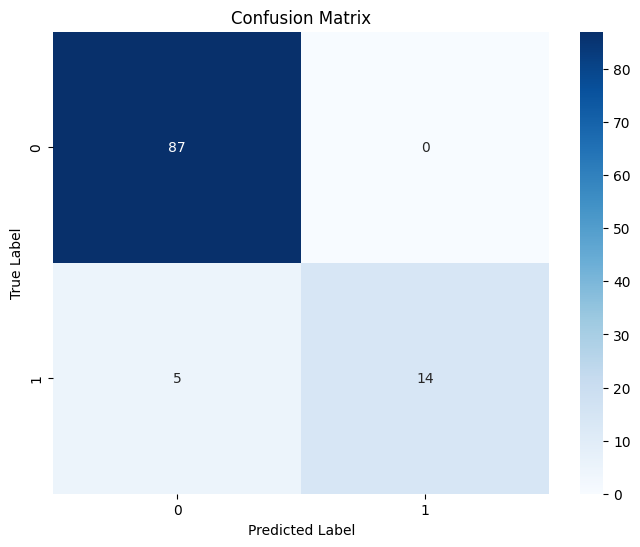

In [82]:
# Early stopping parameters
epochs = 100
patience = 5  # Number of epochs to wait for improvement
best_val_loss = float("inf")
patience_counter = 0

# Train and Validate the Model with TQDM Progress Bar
for epoch in tqdm(range(1, epochs + 1), desc="Training Epochs"):
    train_loss = train()
    val_loss, val_pred = evaluate(data.val_mask)
    val_acc = accuracy_score(data.y[data.val_mask].cpu(), val_pred.cpu())
    print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0  # Reset the patience counter if validation loss improves
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered due to no improvement in validation loss.")
            break

# Test the Model and Calculate Metrics
test_loss, test_pred = evaluate(data.test_mask)
test_true = data.y[data.test_mask].cpu()
test_pred = test_pred.cpu()

# Calculate metrics
accuracy = accuracy_score(test_true, test_pred)
precision = precision_score(test_true, test_pred, zero_division=0)
recall = recall_score(test_true, test_pred)
f1 = f1_score(test_true, test_pred)
roc_auc = roc_auc_score(test_true, model(data.x, data.edge_index)[data.test_mask, 1].detach().cpu().numpy())
logloss = log_loss(test_true, model(data.x, data.edge_index)[data.test_mask].softmax(dim=1).detach().cpu().numpy())
conf_matrix = confusion_matrix(test_true, test_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")
print(f"Log Loss: {logloss}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
